In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Importing Dataset

In [3]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target
feature_names = iris.feature_names
class_names = iris.target_names

In [4]:
# Convert to a Pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Explotator Analysis

## Visualize distributions

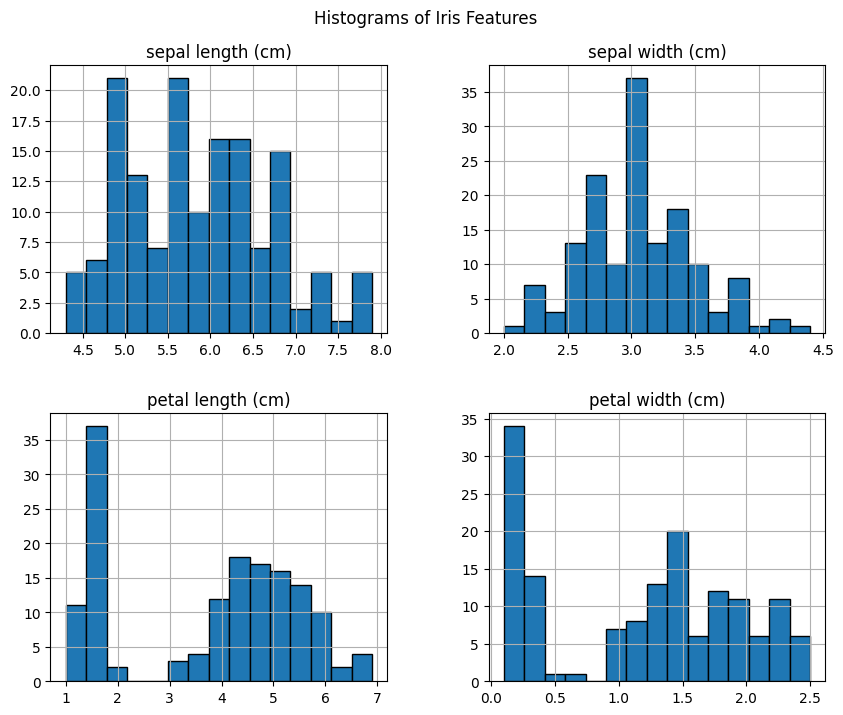

In [8]:
df.drop(columns=['species']).hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Histograms of Iris Features", y=0.95)
plt.show()

No need to normalize

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Checking for Null Values

In [10]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

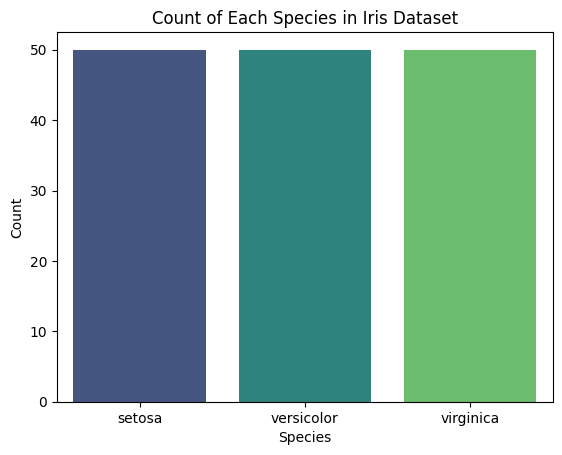

In [11]:
sns.countplot(x='species_name', data=df, hue='species_name', palette='viridis')
plt.title("Count of Each Species in Iris Dataset")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

# Training a Classification Algorithm

In [12]:
copy_df = df.copy()

In [13]:
copy_df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [14]:
copy_df[feature_names]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
X_train, X_test, y_train, y_test = train_test_split(copy_df[feature_names], copy_df['species'], test_size=0.3, random_state=42)

### Using Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression(random_state=42)

In [18]:
lr = lr.fit(X_train, y_train)
lr

LogisticRegression(random_state=42)

In [19]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [20]:
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob

array([[4.09967963e-03, 8.12343754e-01, 1.83556566e-01],
       [9.41955381e-01, 5.80440391e-02, 5.80207936e-07],
       [1.58411066e-08, 2.09129899e-03, 9.97908685e-01],
       [6.82488985e-03, 7.73251372e-01, 2.19923738e-01],
       [1.59400227e-03, 7.51205931e-01, 2.47200067e-01],
       [9.50040956e-01, 4.99585851e-02, 4.58822374e-07],
       [7.78024650e-02, 9.04145055e-01, 1.80524805e-02],
       [1.79835498e-04, 1.47357851e-01, 8.52462314e-01],
       [2.42255564e-03, 7.80452748e-01, 2.17124696e-01],
       [2.89983005e-02, 9.40818591e-01, 3.01831082e-02],
       [4.73568690e-04, 2.25282293e-01, 7.74244138e-01],
       [9.62693742e-01, 3.73060743e-02, 1.84138913e-07],
       [9.69162386e-01, 3.08375177e-02, 9.66516260e-08],
       [9.56006791e-01, 4.39929436e-02, 2.65384131e-07],
       [9.76521687e-01, 2.34781233e-02, 1.89460111e-07],
       [4.76685596e-03, 6.63398478e-01, 3.31834666e-01],
       [9.67224439e-06, 2.67217982e-02, 9.73268530e-01],
       [2.76880579e-02, 9.45164

In [21]:
lr.score(X_test, y_test) 

1.0

In [22]:
f"{lr.score(X_test, y_test) * 100:.2f}%"

'100.00%'

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [24]:
accuracy_score(y_test, y_pred)

1.0

## Random shuffling

In [25]:
sample_df = copy_df.sample(frac=1).reset_index(drop=True)
sample_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,6.1,2.8,4.7,1.2,1,versicolor
1,6.7,3.3,5.7,2.1,2,virginica
2,6.6,2.9,4.6,1.3,1,versicolor
3,7.3,2.9,6.3,1.8,2,virginica
4,6.3,2.5,4.9,1.5,1,versicolor


In [26]:
X_train, X_test, y_train, y_test = train_test_split(sample_df[feature_names], sample_df['species'], test_size=0.3, random_state=42)

In [27]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,4.9,3.0,1.4,0.2
133,6.1,2.6,5.6,1.4
137,6.4,2.9,4.3,1.3
75,5.7,2.6,3.5,1.0
109,5.2,2.7,3.9,1.4
...,...,...,...,...
71,5.4,3.0,4.5,1.5
106,6.3,2.3,4.4,1.3
14,5.7,2.8,4.1,1.3
92,6.9,3.1,5.1,2.3


In [28]:
lr = LogisticRegression(random_state=42, multi_class="multinomial")
lr = lr.fit(X_train, y_train)

/Users/aayamojha/DWIT-TC/data_science_ml/lesson_3/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [29]:
accuracy_score(y_test, lr.predict(X_test))

0.9555555555555556

In [30]:
row = np.array(X_test.iloc[1])
row

array([5.1, 3.5, 1.4, 0.3])

In [31]:
weights = lr.coef_
intercepts = lr.intercept_

In [32]:
row

array([5.1, 3.5, 1.4, 0.3])

In [33]:
weights

array([[-0.52245529,  0.73461547, -2.27990464, -0.92044884],
       [ 0.32095366, -0.25544467, -0.15982369, -0.77597247],
       [ 0.20150163, -0.4791708 ,  2.43972833,  1.69642131]])

In [36]:
np.dot(weights, row) + intercepts

array([ 6.61229877,  2.90180238, -9.51410115])

In [37]:
z = np.dot(weights, row) + intercepts
sigmoid_prob = np.exp(z)/(1 + np.sum(np.exp(z)))

In [38]:
sigmoid_prob

array([9.74840142e-01, 2.38498304e-02, 9.66778332e-08])

In [39]:
y_pred = np.argmax(sigmoid_prob)
y_pred

np.int64(0)

In [40]:
lr.predict([row])

/Users/aayamojha/DWIT-TC/data_science_ml/lesson_3/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

### Using GaussianNB

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
g_nb = GaussianNB().fit(X_train, y_train)

In [47]:
y_pred = g_nb.predict(X_test)

In [49]:
y_pred

array([1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1,
       0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2,
       2])

In [48]:
accuracy_score(y_test, y_pred)

0.9333333333333333